In [159]:
import pandas as pd 

In [160]:
df = pd.read_csv('milanuncios.csv')
df

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,manilva,/alquiler-de-apartamentos-en-manilva-malaga/-3...,900,140m,3 dorm.,2 baños
1,SANCHINARRO - CORTE INGLES,Madrid,/alquiler-de-pisos-en-madrid-madrid/sanchinarr...,1020,85m,1 dorm.,1 baños
2,BAILÉN - MIRAFLORES,malaga,/alquiler-de-pisos-en-malaga-malaga/bailen-mir...,690,70m,3 dorm.,1 baños
3,ZONA PLAZA XÚQUER,paiporta,/alquiler-de-pisos-en-paiporta-valencia/zona-p...,625,80m,3 dorm.,2 baños
4,SANTA MARÍA DE GETXO,getxo,/alquiler-de-aticos-en-getxo-vizcaya/santa-mar...,900,72m,2 dorm.,1 baños
...,...,...,...,...,...,...,...
4517,ZONA UNIVERSIDAD,Ciudad Real,/alquiler-de-apartamentos-en-ciudad-real-ciuda...,250,60m,1 dorm.,1 baños
4518,ATICO DUPLEXSAN BLAS SANTO DOMINGO - CUENCA,Alicante/Alacant,/alquiler-de-aticos-en-alicante|alacant-alican...,850,130m,4 dorm.,2 baños
4519,LOS BOLICHES - FRANCISCO CANO,Fuengirola,/alquiler-de-pisos-en-fuengirola-malaga/los-bo...,750,105m,3 dorm.,2 baños
4520,PISO ALQUILER ALCASSER,Alcasser/Alcacer,/alquiler-de-pisos-en-alcasser|alcacer-valenci...,500,150m,4 dorm.,2 baños


In [28]:
df.dtypes

name                object
location            object
link                object
precio               int64
metros_cuadrados    object
n_dormitorios       object
n_baños             object
dtype: object

Vamos a eliminar las unidades de los datos extraidos para poder tratarlos como números:

In [161]:
df['metros_cuadrados'] = df['metros_cuadrados'].str.replace('m', '')
df['n_dormitorios'] = df['n_dormitorios'].str.replace('dorm.', '')
df['n_baños'] = df['n_baños'].str.replace('baños', '')
df.head()

<ipython-input-161-ed4aa5cf5874>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['n_dormitorios'] = df['n_dormitorios'].str.replace('dorm.', '')


,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,manilva,/alquiler-de-apartamentos-en-manilva-malaga/-3...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,Madrid,/alquiler-de-pisos-en-madrid-madrid/sanchinarr...,1020,85,1,1
2,BAILÉN - MIRAFLORES,malaga,/alquiler-de-pisos-en-malaga-malaga/bailen-mir...,690,70,3,1
3,ZONA PLAZA XÚQUER,paiporta,/alquiler-de-pisos-en-paiporta-valencia/zona-p...,625,80,3,2
4,SANTA MARÍA DE GETXO,getxo,/alquiler-de-aticos-en-getxo-vizcaya/santa-mar...,900,72,2,1


Los links extraidos son links parciales, desde la página dónde se han extraido, por ello añadimos el prefijo para convertirlo un link más práctico:

In [162]:
df['link'] = 'https://www.milanuncios.com/alquiler-de-pisos' + df['link']

Para dar uniformidad y evitar duplicados como 'madrid' y 'Madrid', pasamos el texto a todo mayúsculas

In [163]:
df['location'] = df['location'].str.upper()

In [164]:
df.head()

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1


A continuación extraemos los pisos con información incompleta, como no son muchos, los eliminaremos directamente.

In [173]:
df[df.isna().any(axis=1)]

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2


In [174]:
df.dropna(inplace=True)

In [167]:
df

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1
...,...,...,...,...,...,...,...
4516,ZONA UNIVERSIDAD,CIUDAD REAL,https://www.milanuncios.com/alquiler-de-pisos/...,400,70,2,1
4517,ZONA UNIVERSIDAD,CIUDAD REAL,https://www.milanuncios.com/alquiler-de-pisos/...,250,60,1,1
4518,ATICO DUPLEXSAN BLAS SANTO DOMINGO - CUENCA,ALICANTE/ALACANT,https://www.milanuncios.com/alquiler-de-pisos/...,850,130,4,2
4519,LOS BOLICHES - FRANCISCO CANO,FUENGIROLA,https://www.milanuncios.com/alquiler-de-pisos/...,750,105,3,2


Convertimos algunas de las columnas a formato de número:

In [168]:
df.metros_cuadrados = df.metros_cuadrados.astype(int)
df.n_dormitorios = df.n_dormitorios.astype(int)
df.n_baños = df.n_baños.astype(int)
df.dtypes

name                object
location            object
link                object
precio               int64
metros_cuadrados     int64
n_dormitorios        int64
n_baños              int64
dtype: object

Añadimos la métrica de €/metro_cuadrado

In [169]:
df['precio/metro2'] = df['precio'] / df['metros_cuadrados']
df.head()

,name,location,link,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
0,- . REF: 437-00038P. LA PROPIEDAD \n \n,MANILVA,https://www.milanuncios.com/alquiler-de-pisos/...,900,140,3,2,6.428571
1,SANCHINARRO - CORTE INGLES,MADRID,https://www.milanuncios.com/alquiler-de-pisos/...,1020,85,1,1,12.000000
2,BAILÉN - MIRAFLORES,MALAGA,https://www.milanuncios.com/alquiler-de-pisos/...,690,70,3,1,9.857143
3,ZONA PLAZA XÚQUER,PAIPORTA,https://www.milanuncios.com/alquiler-de-pisos/...,625,80,3,2,7.812500
4,SANTA MARÍA DE GETXO,GETXO,https://www.milanuncios.com/alquiler-de-pisos/...,900,72,2,1,12.500000


In [38]:
df.describe()

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
count,4168.000000,4168.000000,4168.000000,4168.000000,4168.000000
mean,682.548944,82.871401,2.265355,1.380038,9.815071
std,2567.944714,64.365939,1.945040,0.554671,40.868485
min,1.000000,1.000000,1.000000,1.000000,0.000667
25%,450.000000,60.000000,1.000000,1.000000,6.000000
50%,575.000000,75.000000,2.000000,1.000000,7.911392
75%,750.000000,95.000000,3.000000,2.000000,10.000000
max,165000.000000,2000.000000,90.000000,6.000000,1853.932584


El máximo de precio es de 165K para alquiler, cosa que no tiene mucho sentido. Vamos a fijarnos en los precios más altos del dataset:

Al consultar el anuncio, comprobamos que se trata de una venta, no de un alquiler. Es decir, es un anuncio mal puesto, así que lo eliminamos del dataset:

Se agrupa por localización y se ordena por €/metro_cuadrado de menor a mayor, en el siguiente bloque nos fijamos en las 20 localizaciones más caras por metro cuadrado de españa para alquiler en milanuncios.

In [39]:
ndq99 = df["n_dormitorios"].quantile(0.99)
nbq99 = df["n_baños"].quantile(0.99)
mcq99 = df["metros_cuadrados"].quantile(0.99)
pq99 = df["precio"].quantile(0.99)
print(f'percentil top 1% en número de dormitorios: {ndq99}')
print(f'percentil top 1% en número de baños: {nbq99}')
print(f'percentil top 1% en metros cuadrados: {mcq99}')
print(f'percentil top 1% en precio: {pq99}')

percentil top 1% en número de dormitorios: 5.0
percentil top 1% en número de baños: 3.0
percentil top 1% en metros cuadrados: 200.0
percentil top 1% en precio: 1900.0


Eliminamos los outliers para el posterior modelo preliminar:

In [44]:
print(len(df))
print(len(df[df["n_dormitorios"]<=ndq99]))
print(len(df[df["n_baños"]<=nbq99]))
print(len(df[df["metros_cuadrados"]<=mcq99]))
print(len(df[df["precio"]<=pq99]))

4168
4152
4154
4130
4129


In [45]:
df = df[df["precio"]<=pq99]

In [46]:
df_location = df.groupby(['location']).mean().sort_values('precio/metro2')
df_location

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
location,,,,,
CHIPIONA,1.000000,80.000000,3.000000,2.00000,0.012500
VILA SECA DE SOLCINA/VILASECA,40.000000,60.000000,1.000000,1.00000,0.666667
CONIL DE LA FRONTERA,40.000000,55.000000,2.000000,1.00000,0.727273
BARRIADA FAÑABE,780.000000,999.000000,3.000000,2.00000,0.780781
GUADALUPE,200.000000,120.000000,4.000000,2.00000,1.666667
...,...,...,...,...,...
PALMANOVA,1700.000000,100.000000,2.000000,2.00000,17.000000
CANDELARIA (S.C. PALMA),1200.000000,70.000000,1.000000,1.00000,17.142857
SANTA PONÇA,600.000000,35.000000,1.000000,1.00000,17.142857


In [47]:
df_location.tail(20)

,precio,metros_cuadrados,n_dormitorios,n_baños,precio/metro2
location,,,,,
SABADELL,591.666667,43.333333,1.333333,1.000000,13.703704
PUERTO DEL CARMEN,550.000000,40.000000,1.000000,1.000000,13.750000
ARGUINEGUIN,550.000000,40.000000,1.000000,1.000000,13.750000
ARENALES DEL SOL,900.000000,65.000000,2.000000,2.000000,13.846154
IBIZA / EIVISSA,1395.000000,104.200000,3.200000,1.600000,13.895655
MADRID,863.885167,70.459330,1.947368,1.306220,13.981445
SANT CUGAT DEL VALLES,1190.000000,96.000000,4.000000,1.500000,14.004963
CALVIA,1006.666667,68.333333,1.333333,1.333333,14.066667
ALBORAYA,1100.000000,75.000000,2.000000,2.000000,14.666667


A continuación se muestra la esperable tendencia de aumento de precio con los metros_cuadrados de la vivienda.
Además observamos que casi todos los pisos están por debajo de los 150 metros cuadrados 

<AxesSubplot:xlabel='metros_cuadrados', ylabel='precio'>

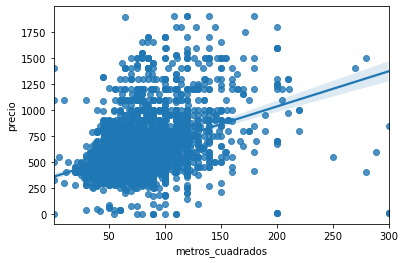

In [48]:
import seaborn as sns
sns.regplot(x='metros_cuadrados', y='precio', data=df[(df['precio']<2000)& (df['metros_cuadrados'] < 500)])
                                                      

Vamos a obtener la misma gráfica pero para el número de dormitorios y el número de baños.
También existe una correlación positiva entre el aumento de estas variables y el precio, sobretodo con el número de baños.

<AxesSubplot:xlabel='n_dormitorios', ylabel='precio'>

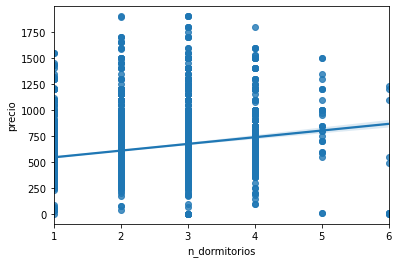

In [49]:
sns.regplot(x='n_dormitorios', y='precio', data=df[(df['precio']<2000)& (df['n_dormitorios'] < 60)])

<AxesSubplot:xlabel='n_baños', ylabel='precio'>

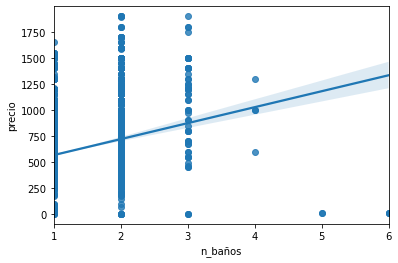

In [50]:
sns.regplot(x='n_baños', y='precio', data=df[(df['precio']<2000)& (df['n_baños'] < 60)])

# Modeling

In [219]:
model_df = df[['metros_cuadrados', 'n_dormitorios', 'n_baños', 'precio']]
model_df.head(10)

,metros_cuadrados,n_dormitorios,n_baños,precio
0,140,3,2,900
1,85,1,1,1020
2,70,3,1,690
3,80,3,2,625
4,72,2,1,900
5,104,3,2,550
6,95,3,1,800
7,60,1,1,550
8,60,2,1,550
9,60,1,1,890


In [52]:
from sklearn.model_selection import train_test_split
X = model_df.iloc[:, :3]
Y = model_df.iloc[:, 3]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print(f'Coefficients:{reg.coef_}')

Coefficients:[6.77658397e-02 1.95278641e+00 1.47753659e+02]


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = reg.predict(X_test) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

Mean squared Error: 65592.76190153304
R2 Score: 0.0969622168191252


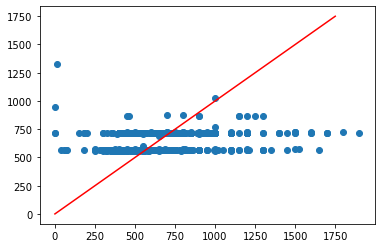

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Y_test, Y_pred)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')

Este simple modelo lineal claramente sufre de underfitting, y no tiene suficiente complejidad para realizar predicciones

## Model with Location

In [355]:
model_df_2 = df[['metros_cuadrados', 'n_dormitorios', 'n_baños', 'precio', 'location']]

Eliminamos las localizaciones con pocos puntos de datos, nos quedamos solo en las que haya más de 100 ofertas.

In [356]:
df_count = df.groupby(['location']).count().sort_values('name')['name']
df_count

location
LAVIADA                   1
EL ROQUE (S. MIGUEL)      1
EL SUCULUM                1
TEJINA DE ISORA           1
EL VERGER                 1
                       ... 
VALENCIA                155
ALICANTE/ALACANT        185
MADRID                  218
SEVILLA                 226
CIUDAD REAL             440
Name: name, Length: 431, dtype: int64

In [357]:
df_count.where(df_count <= 1).count()

201

In [358]:
df_count.where(df_count <= 15).count()

383

In [359]:
df_count.where(df_count > 100).count()

8

In [360]:
sum(df_count.where(df_count > 100).dropna())

1626.0

In [361]:
locations = df_count.where(df_count > 100).dropna().index
locations

Index(['SALAMANCA', 'ZARAGOZA', 'CÓRDOBA', 'VALENCIA', 'ALICANTE/ALACANT',
       'MADRID', 'SEVILLA', 'CIUDAD REAL'],
      dtype='object', name='location')

In [362]:
model_df_2 = model_df_2.where(model_df_2.location.isin(locations)).dropna()
model_df_2

,metros_cuadrados,n_dormitorios,n_baños,precio,location
1,85.0,1.0,1.0,1020.0,MADRID
9,60.0,1.0,1.0,890.0,MADRID
12,75.0,2.0,1.0,1100.0,MADRID
13,75.0,2.0,1.0,1000.0,MADRID
14,66.0,1.0,1.0,850.0,MADRID
...,...,...,...,...,...
4507,119.0,4.0,2.0,770.0,VALENCIA
4515,90.0,3.0,2.0,350.0,CIUDAD REAL
4516,70.0,2.0,1.0,400.0,CIUDAD REAL
4517,60.0,1.0,1.0,250.0,CIUDAD REAL


In [363]:
dummy_location = pd.get_dummies(model_df_2['location'])
dummy_location.head()

,ALICANTE/ALACANT,CIUDAD REAL,CÓRDOBA,MADRID,SALAMANCA,SEVILLA,VALENCIA,ZARAGOZA
1,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0
12,0,0,0,1,0,0,0,0
13,0,0,0,1,0,0,0,0
14,0,0,0,1,0,0,0,0


In [364]:
model_df_2 = pd.merge(left=model_df, right=dummy_location, left_index=True, right_index=True)
model_df_2.head()

,metros_cuadrados,n_dormitorios,n_baños,precio,ALICANTE/ALACANT,CIUDAD REAL,CÓRDOBA,MADRID,SALAMANCA,SEVILLA,VALENCIA,ZARAGOZA
1,85,1,1,1020,0,0,0,1,0,0,0,0
9,60,1,1,890,0,0,0,1,0,0,0,0
12,75,2,1,1100,0,0,0,1,0,0,0,0
13,75,2,1,1000,0,0,0,1,0,0,0,0
14,66,1,1,850,0,0,0,1,0,0,0,0


In [365]:
Y = model_df_2['precio']
X = model_df_2.drop(columns=['precio'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [366]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
#print(f'Coefficients:{reg.coef_}')

LinearRegression()

In [367]:
Y_pred = reg.predict(X_test) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'Root Mean squared Error: {mean_squared_error(Y_test, Y_pred, squared=False)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

Mean squared Error: 66712.3872919935
Root Mean squared Error: 258.2874121826178
R2 Score: 0.33338396040527396


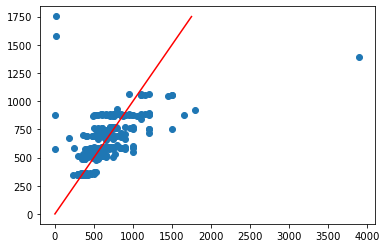

In [368]:
plt.scatter(Y_test, Y_pred)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')

In [369]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, Y_train)
#print(f'Coefficients:{lin_reg_2.coef_}')

LinearRegression()

In [370]:
X_test_poly = poly_reg.fit_transform(X_test)
Y_pred_2 = lin_reg_2.predict(X_test_poly) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred_2)}')
print(f'Root Mean squared Error: {mean_squared_error(Y_test, Y_pred_2, squared=False)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred_2)}')

Mean squared Error: 31779.902730508715
Root Mean squared Error: 178.26918614979067
R2 Score: 0.6824428901908017


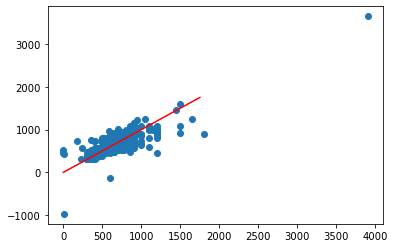

In [371]:
plt.scatter(Y_test, Y_pred_2)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')

### Modelo en CIUDAD REAL
Es la ciudad en la que tenemos más datos
Cómo funcionaría un modelo para esta ciudad en específico?

In [372]:
model_df_cr = df.where(df['location']=='CIUDAD REAL')[['metros_cuadrados', 'n_dormitorios', 'n_baños', 'precio']]
model_df_cr.dropna(inplace=True)
model_df_cr.head(10)

,metros_cuadrados,n_dormitorios,n_baños,precio
1486,140.0,4.0,2.0,700.0
1489,70.0,2.0,2.0,500.0
1514,70.0,2.0,1.0,450.0
1517,70.0,2.0,1.0,430.0
1519,100.0,3.0,2.0,550.0
1521,70.0,2.0,2.0,460.0
1523,70.0,2.0,1.0,450.0
1542,100.0,3.0,2.0,580.0
1544,100.0,3.0,2.0,575.0
1549,50.0,1.0,1.0,280.0


In [373]:
from sklearn.model_selection import train_test_split
X = model_df_cr.iloc[:, :3]
Y = model_df_cr.iloc[:, 3]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [374]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print(f'Coefficients:{reg.coef_}')

Coefficients:[ 0.09892751 56.40085959 51.57865363]


In [376]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = reg.predict(X_test) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred)}')
print(f'Root Mean squared Error: {mean_squared_error(Y_test, Y_pred, squared=False)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

Mean squared Error: 7285.223610658158
Root Mean squared Error: 85.353521372338
R2 Score: 0.5516136086862806


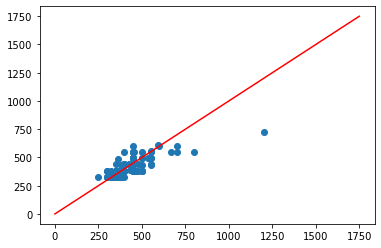

In [377]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Y_test, Y_pred)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')

In [378]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, Y_train)
print(f'Coefficients:{lin_reg_2.coef_}')

Coefficients:[ 0.00000000e+00  1.33414481e+00 -3.97646123e+01  1.30853401e+02
 -2.04875761e-03  1.44838102e-01 -7.05767347e-02  7.02035336e+00
  1.74938534e+01 -4.08232983e+01]


In [379]:
X_test_poly = poly_reg.fit_transform(X_test)
Y_pred_2 = lin_reg_2.predict(X_test_poly) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred_2)}')
print(f'Root Mean squared Error: {mean_squared_error(Y_test, Y_pred_2, squared=False)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred_2)}')

Mean squared Error: 5794.407675946382
Root Mean squared Error: 76.12100679803429
R2 Score: 0.6433694164421955


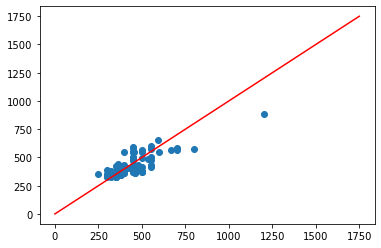

In [380]:
plt.scatter(Y_test, Y_pred_2)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')

In [381]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, Y_train)
print(f'Coefficients:{lin_reg_2.coef_}')

Coefficients:[ 0.00000000e+00  3.18179983e+00  1.34427129e+02 -4.05664307e+02
 -5.16290114e-02  1.39471046e+00  1.58018370e+00 -1.18244003e+02
  9.73282262e+01  1.47468190e+02 -2.31999395e-07 -1.84437870e-03
  2.71454687e-02  1.03321663e-01 -6.15742911e-01 -1.56733179e+00
  2.16826397e+01 -4.79710945e+01  8.43963775e+01 -4.94619682e+01]


In [382]:
X_test_poly = poly_reg.fit_transform(X_test)
Y_pred_2 = lin_reg_2.predict(X_test_poly) 
print(f'Mean squared Error: {mean_squared_error(Y_test, Y_pred_2)}')
print(f'Root Mean squared Error: {mean_squared_error(Y_test, Y_pred_2, squared=False)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred_2)}')

Mean squared Error: 4696.061045903792
Root Mean squared Error: 68.52781220718921
R2 Score: 0.7109697686312328


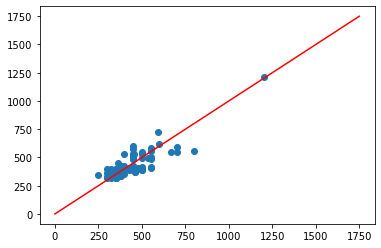

In [383]:
plt.scatter(Y_test, Y_pred_2)
plt.plot(np.linspace(0, 1750, 100),np.linspace(0, 1750, 100), color='red')